# Heart Disease Assignment Solution

# Khuram Shahzad 34202-8040332-9

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('heart_disease.csv')

In [2]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


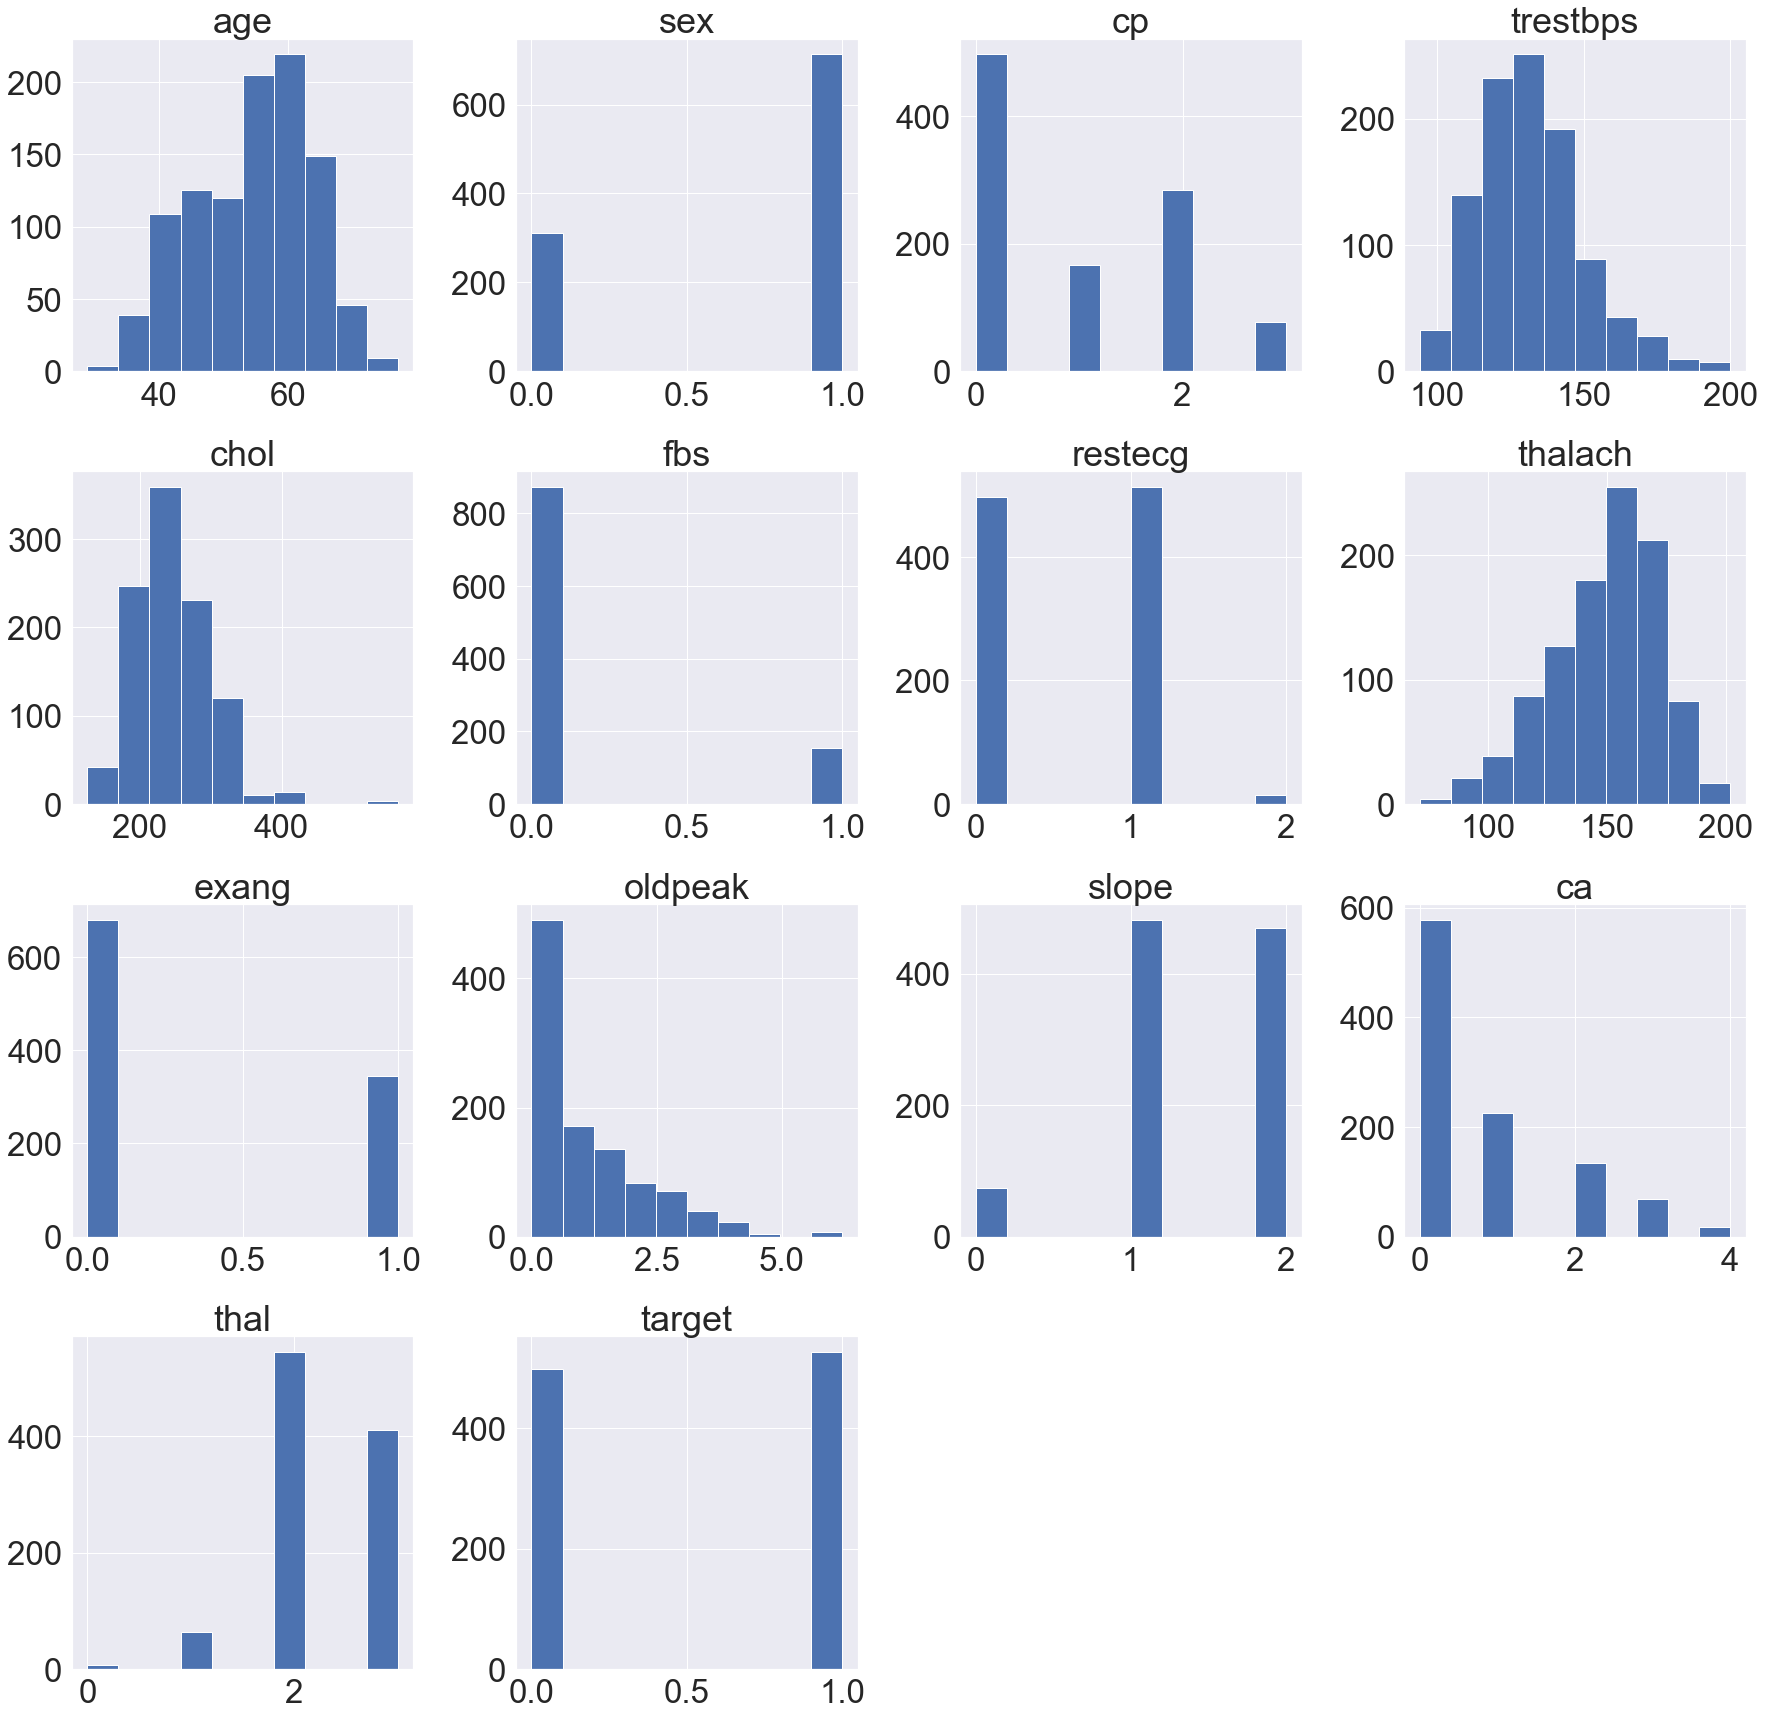

In [6]:
sns.set(font_scale=3)
data.hist(figsize=(30,30))
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

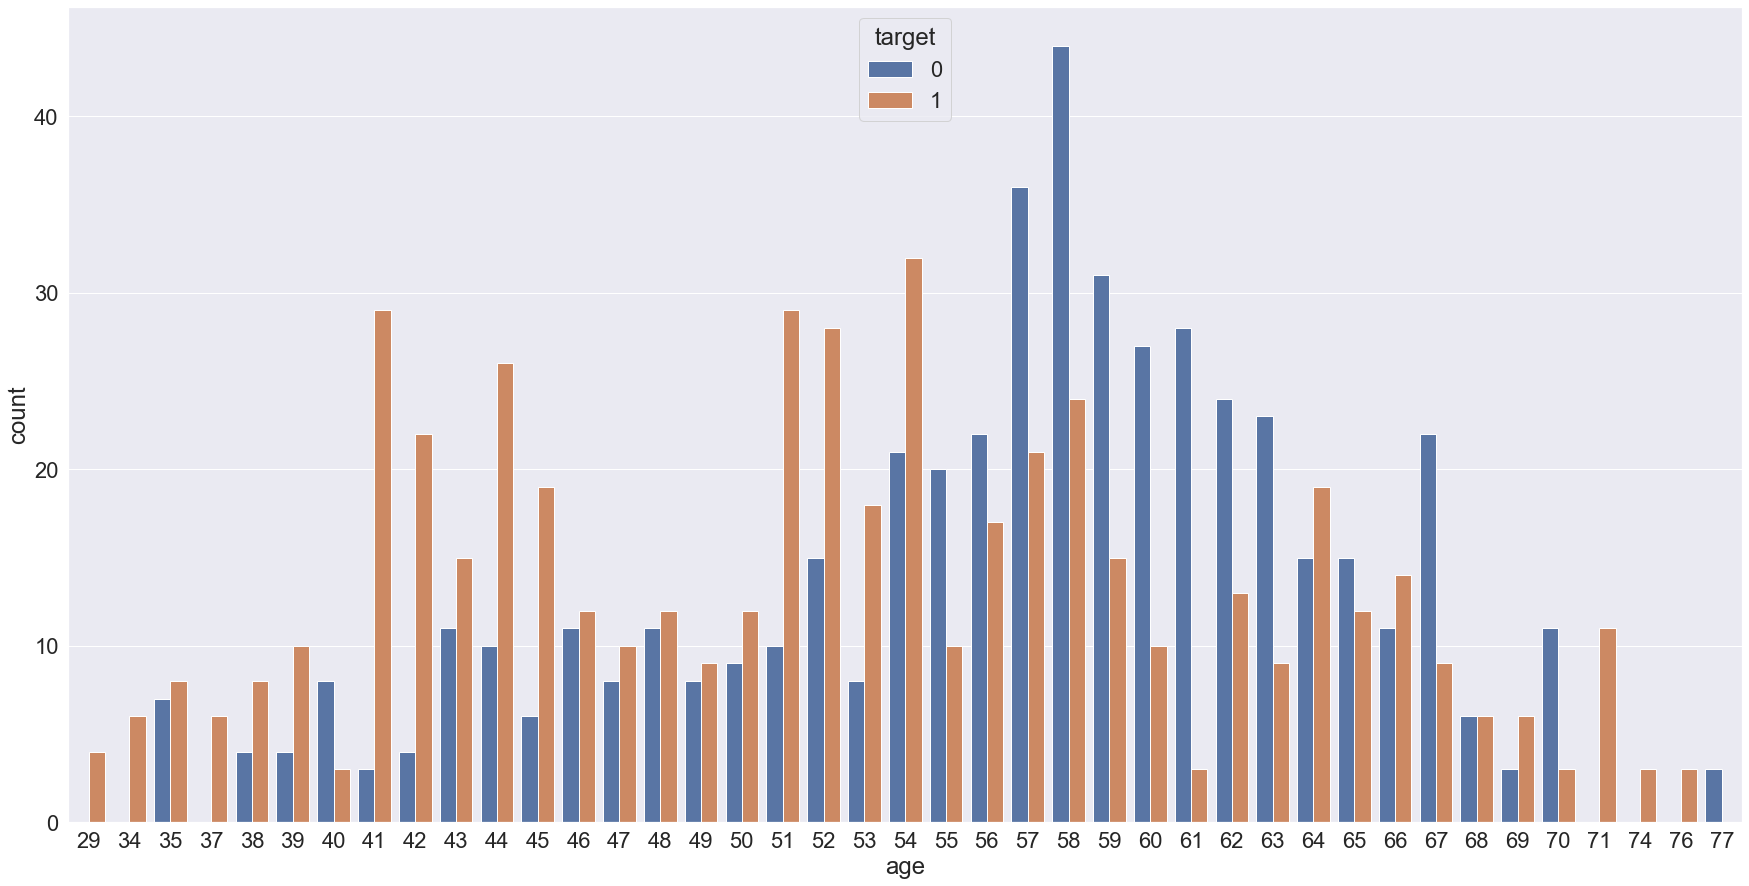

In [7]:
sns.set(font_scale=2)
plt.figure(figsize=(30,15))
sns.countplot(x='age', hue='target', data=data)

In [8]:
data = datasets.load_iris()
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
my_df = pd.DataFrame(data=data.data, columns=data.feature_names)
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
my_df['LABEL'] = pd.Series(data.target)
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),LABEL
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
my_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),LABEL
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [15]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   LABEL              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
my_df.LABEL.value_counts()

0    50
1    50
2    50
Name: LABEL, dtype: int64

<AxesSubplot:ylabel='count'>

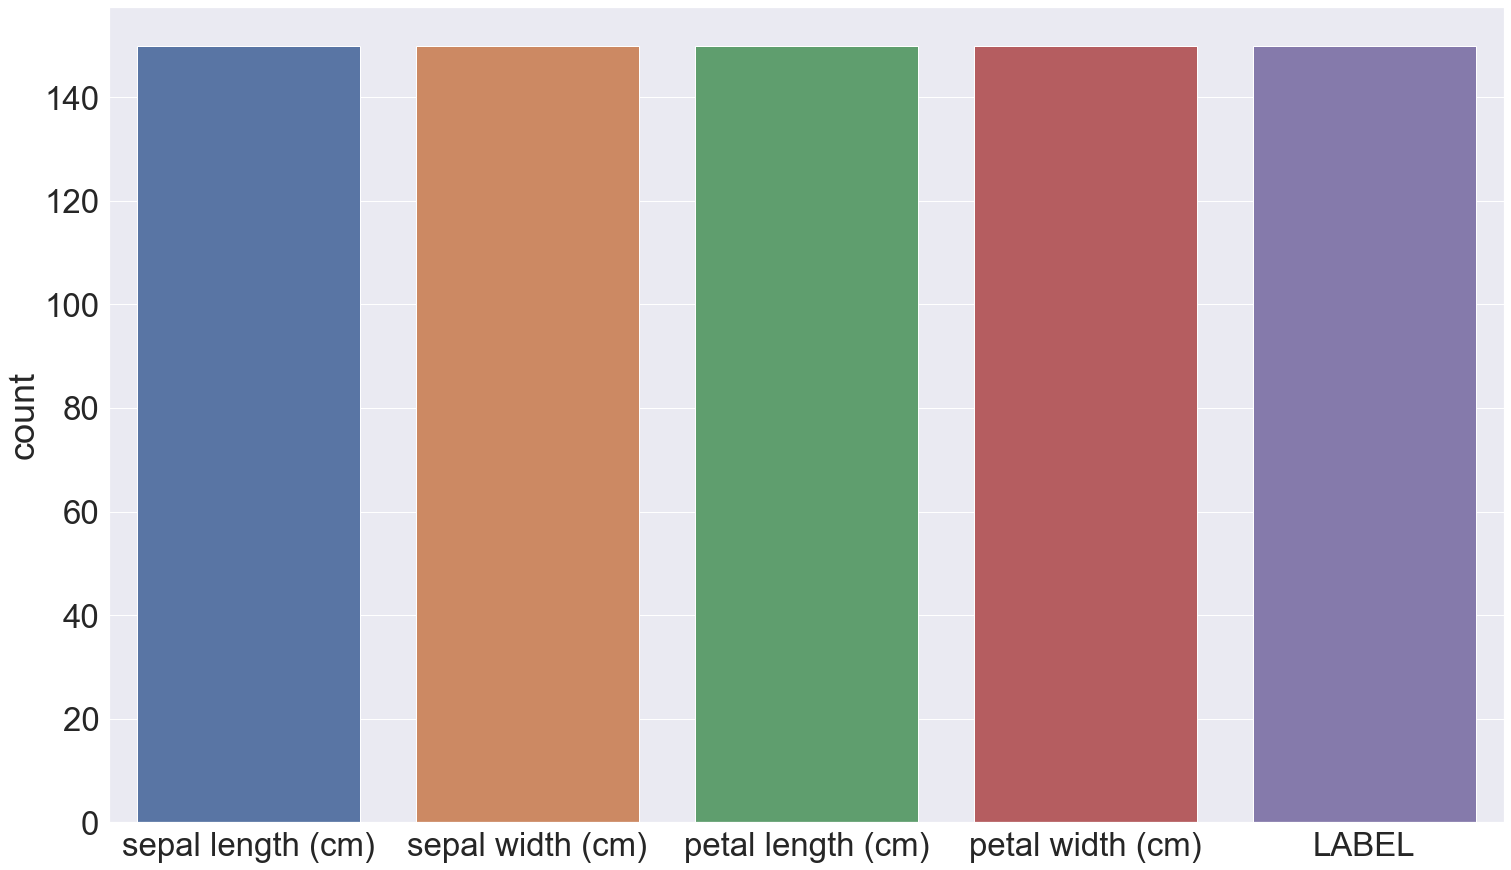

In [17]:
sns.set(font_scale=3)
plt.figure(figsize=(25,15))
sns.countplot(data=my_df)

# Applying models

In [18]:
x = my_df.drop('LABEL', axis=1)
y = my_df['LABEL']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# KNN Model

Accuracy in KNN model is  93.33333333333333


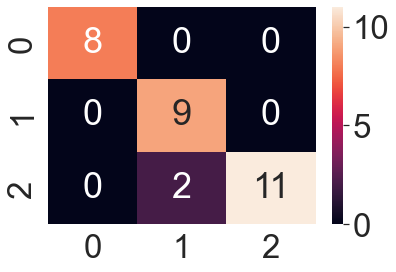

<Figure size 360x360 with 0 Axes>

In [20]:
kn_neighbour = KNeighborsClassifier()
kn_neighbour.fit(x_train, y_train)
y_pred_KNN = kn_neighbour.predict(x_test)      # y_pred_KNN is new variable to make difference in other models.
KNN_accuracy = metrics.accuracy_score(y_test, y_pred_KNN)*100
print("Accuracy in KNN model is ", KNN_accuracy)

## Confusion Matrix
cm = confusion_matrix(y_pred_KNN, y_test)
sns.heatmap(cm, annot=True, fmt='g')
sns.set(font_scale=3)
plt.figure(figsize=(5,5))
plt.show()

[0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


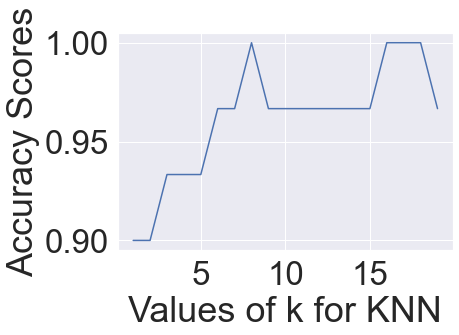

<Figure size 720x504 with 0 Axes>

In [21]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    kn_neighbour = KNeighborsClassifier(n_neighbors = k)
    kn_neighbour.fit(x_train, y_train)
    y_predic = kn_neighbour.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predic))
print(scores)
print(k_range)
plt.plot(k_range, scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Accuracy Scores')
sns.set(font_scale=2)
plt.figure(figsize=(10,7))
plt.show()

# Decision Tree Classifier Model

Accuracy in Decision Tree Model is  90.0


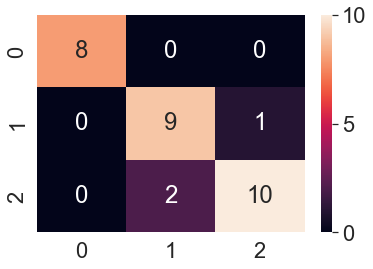

<Figure size 360x360 with 0 Axes>

In [22]:
DT = DecisionTreeClassifier()
# implementing model
DT.fit(x_train, y_train)
# predistion
y_pred_DTC = DT.predict(x_test)
DT_accuracy = accuracy_score(y_test, y_pred_DTC)*100
print("Accuracy in Decision Tree Model is ",DT_accuracy)

## Confusion Matrix
cm = confusion_matrix(y_pred_DTC, y_test)
sns.heatmap(cm, annot=True, fmt='g')
sns.set(font_scale=3)
plt.figure(figsize=(5,5))
plt.show()

[0.9, 0.9, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


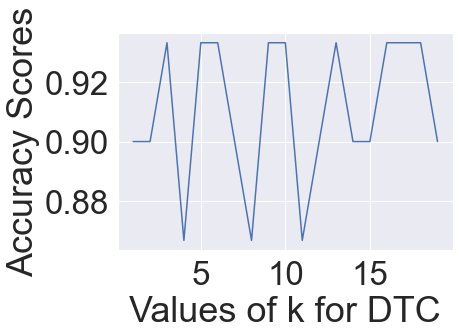

<Figure size 720x504 with 0 Axes>

In [23]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(x_train, y_train)
    y_predic = dt_classifier.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predic))
print(scores)
print(k_range)
plt.plot(k_range, scores)
plt.xlabel('Values of k for DTC')
plt.ylabel('Accuracy Scores')
sns.set(font_scale=2)
plt.figure(figsize=(10,7))
plt.show()

# LR or Logisctic Regression Model

Accuracy in LR Model is  96.66666666666667


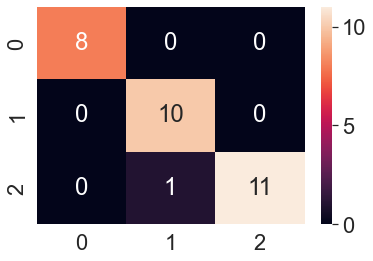

<Figure size 360x360 with 0 Axes>

In [24]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
LR_accuracy = accuracy_score(y_test, y_pred_LR)*100
print("Accuracy in LR Model is ",LR_accuracy)

## Confusion Matrix
cm = confusion_matrix(y_pred_LR, y_test)
sns.heatmap(cm, annot=True, fmt='g')
sns.set(font_scale=3)
plt.figure(figsize=(5,5))
plt.show()

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


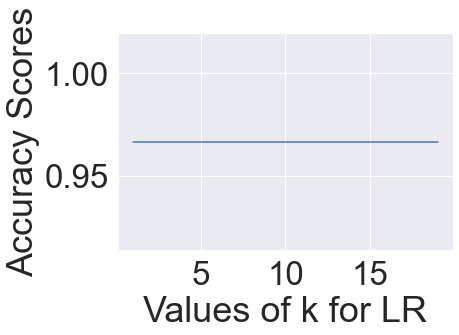

<Figure size 720x504 with 0 Axes>

In [25]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    l_regression = LogisticRegression()
    l_regression.fit(x_train, y_train)
    y_predic = l_regression.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predic))
print(scores)
print(k_range)
plt.plot(k_range, scores)
plt.xlabel('Values of k for LR')
plt.ylabel('Accuracy Scores')
sns.set(font_scale=2)
plt.figure(figsize=(10,7))
plt.show()

# Random Forest Model

Random Forest Accuracy is: 90.0


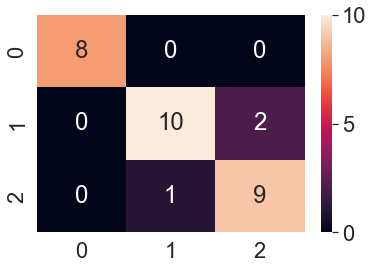

<Figure size 360x360 with 0 Axes>

In [26]:
RT = RandomForestClassifier()
RT.fit(x_train, y_train)
y_pred_RT = RT.predict(x_test)
acc = accuracy_score(y_test, y_pred_RT)*100
print(f"Random Forest Accuracy is: {acc}")

## Confusion Matrix
cm = confusion_matrix(y_pred_RT, y_test)
sns.heatmap(cm, annot=True, fmt='g')
sns.set(font_scale=3)
plt.figure(figsize=(5,5))
plt.show()

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


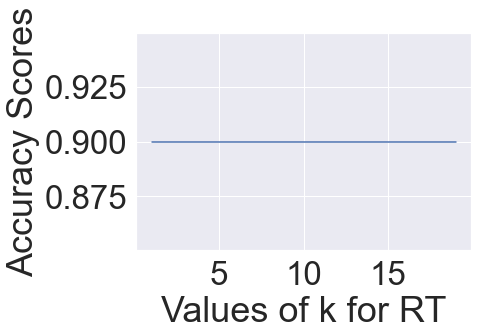

<Figure size 720x504 with 0 Axes>

In [27]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    rt_classifier = RandomForestClassifier()
    rt_classifier.fit(x_train, y_train)
    y_predic = rt_classifier.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predic))
print(scores)
print(k_range)
plt.plot(k_range, scores)
plt.xlabel('Values of k for RT')
plt.ylabel('Accuracy Scores')
sns.set(font_scale=2)
plt.figure(figsize=(10,7))
plt.show()

# GaussianNB Model

GaussianNB Accuracy is: 90.0


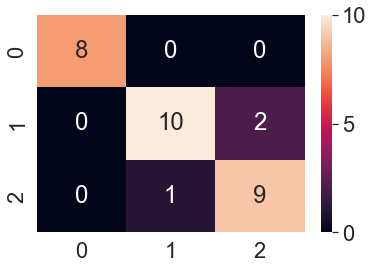

<Figure size 360x360 with 0 Axes>

In [28]:
GNB = GaussianNB()
RT.fit(x_train, y_train)
y_pred_GNB = RT.predict(x_test)
acc = accuracy_score(y_test, y_pred_GNB)*100
print(f"GaussianNB Accuracy is: {acc}")

## Confusion Matrix
cm = confusion_matrix(y_pred_GNB, y_test)
sns.heatmap(cm, annot=True, fmt='g')
sns.set(font_scale=3)
plt.figure(figsize=(5,5))
plt.show()

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


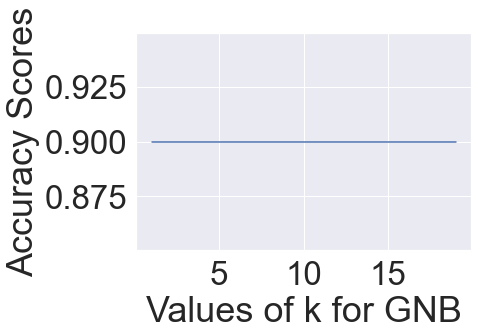

<Figure size 720x504 with 0 Axes>

In [29]:
k_range = list(range(1,20))
scores = []

for k in k_range:
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_predic = gnb.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predic))
print(scores)
print(k_range)
plt.plot(k_range, scores)
plt.xlabel('Values of k for GNB')
plt.ylabel('Accuracy Scores')
sns.set(font_scale=2)
plt.figure(figsize=(10,7))
plt.show()

# Accuracy plot

In [30]:
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RT',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
print(models)

[('DT', DecisionTreeClassifier()), ('RT', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('GNB', GaussianNB())]


In [31]:
names = []
results = []

In [32]:
for name, model in models:
    obj = model
    names.append(name)
    obj.fit(x_train, y_train)
    y_pred = obj.predict(x_test)
    results.append(accuracy_score(y_test, y_pred)*100)
    print(results)

[93.33333333333333]
[93.33333333333333, 90.0]
[93.33333333333333, 90.0, 93.33333333333333]
[93.33333333333333, 90.0, 93.33333333333333, 96.66666666666667]
[93.33333333333333, 90.0, 93.33333333333333, 96.66666666666667, 90.0]


<Figure size 576x360 with 0 Axes>

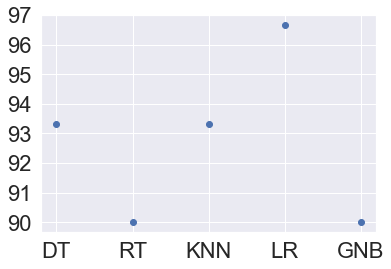

<Figure size 576x360 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
plt.scatter(names, results)
sns.set(font_scale=1)
plt.figure(figsize=(8,5))